In [8]:
import glob
import os
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

SCORES_DIR = 'scores_grid'
results = defaultdict(list)  # (rollouts, epsilon) -> list[int]
for path in glob.glob(os.path.join(SCORES_DIR, 'scores_r*_eps*.txt')):
    fname = os.path.basename(path)
    parts = fname.split('_')
    rollouts = int(parts[1][1:])
    epsilon = float(parts[2][3:].replace('p', '.').replace('.txt', ''))
    with open(path, 'r', encoding='utf-8') as fh:
        for line in fh:
            _, score = line.strip().split('	')
            results[(rollouts, epsilon)].append(int(score))

summary = []
for (rollouts, epsilon), scores in sorted(results.items()):
    scores_arr = np.array(scores)
    mean = scores_arr.mean()
    std = scores_arr.std(ddof=1) if len(scores_arr) > 1 else 0.0
    stderr = std / np.sqrt(len(scores_arr)) if len(scores_arr) > 0 else 0.0
    summary.append((rollouts, epsilon, len(scores_arr), mean, std, stderr))

summary

[(2, 0.0, 10, 13.7, 1.888562063228706, 0.5972157622389639),
 (2, 0.05, 10, 13.7, 1.888562063228706, 0.5972157622389639),
 (2, 0.1, 10, 13.7, 1.888562063228706, 0.5972157622389639),
 (2, 0.2, 10, 13.7, 1.888562063228706, 0.5972157622389639),
 (4, 0.0, 10, 16.2, 2.043961295567452, 0.6463573143221771),
 (4, 0.05, 10, 16.2, 2.043961295567452, 0.6463573143221771),
 (4, 0.1, 10, 16.2, 2.043961295567452, 0.6463573143221771),
 (4, 0.2, 10, 16.2, 2.043961295567452, 0.6463573143221771),
 (8, 0.0, 10, 16.7, 1.4944341180973264, 0.47258156262526085),
 (8, 0.05, 10, 16.7, 1.4944341180973264, 0.47258156262526085),
 (8, 0.1, 10, 16.7, 1.4944341180973264, 0.47258156262526085),
 (8, 0.2, 10, 16.8, 1.6865480854231356, 0.5333333333333333),
 (16, 0.0, 10, 17.6, 2.3664319132398464, 0.7483314773547882),
 (16, 0.05, 10, 17.6, 2.3664319132398464, 0.7483314773547882),
 (16, 0.1, 10, 17.9, 2.1832697191750423, 0.6904105059069326),
 (16, 0.2, 10, 17.2, 2.5298221281347035, 0.7999999999999999)]

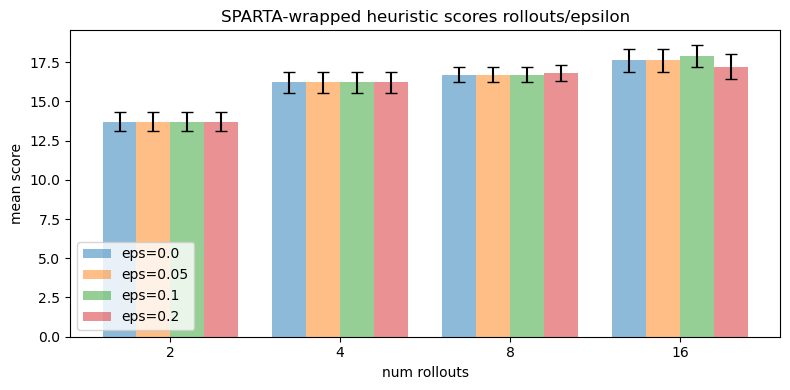

In [11]:
rollout_values = sorted(set(r for r, _, _, _, _, _ in summary))
epsilon_values = sorted(set(e for _, e, _, _, _, _ in summary))
mean_matrix = np.zeros((len(rollout_values), len(epsilon_values)))
stderr_matrix = np.zeros_like(mean_matrix)
mean_dict = {(r, e): mean for (r, e, _, mean, _, _) in summary}
stderr_dict = {(r, e): stderr for (r, e, _, _, _, stderr) in summary}
for r_idx, r in enumerate(rollout_values):
    for e_idx, eps in enumerate(epsilon_values):
        mean_matrix[r_idx, e_idx] = mean_dict.get((r, eps), np.nan)
        stderr_matrix[r_idx, e_idx] = stderr_dict.get((r, eps), np.nan)

fig, ax = plt.subplots(figsize=(8, 4))
width = 0.2
x = np.arange(len(rollout_values))
for e_idx, eps in enumerate(epsilon_values):
    bar_positions = x + e_idx * width
    ax.bar(bar_positions, mean_matrix[:, e_idx], width=width, label=f'eps={eps}', yerr=stderr_matrix[:, e_idx], capsize=4, alpha=0.5)
ax.set_xticks(x + width * (len(epsilon_values) - 1) / 2)
ax.set_xticklabels(rollout_values)
ax.set_xlabel('num rollouts')
ax.set_ylabel('mean score')
ax.set_title('SPARTA-wrapped heuristic scores rollouts/epsilon')
ax.legend()
plt.tight_layout()